In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('effect_data.csv')

In [2]:
data.head()

,Unnamed: 0,species,chemical,conc (mol/L)
0,0,https://cfpub.epa.gov/ecotox/taxon/1,https://cfpub.epa.gov/ecotox/cas/10025919,3.051629
1,1,https://cfpub.epa.gov/ecotox/taxon/1,https://cfpub.epa.gov/ecotox/cas/10028156,5.681105
2,2,https://cfpub.epa.gov/ecotox/taxon/1,https://cfpub.epa.gov/ecotox/cas/100414,3.398977
3,3,https://cfpub.epa.gov/ecotox/taxon/1,https://cfpub.epa.gov/ecotox/cas/100425,3.512146
4,4,https://cfpub.epa.gov/ecotox/taxon/1,https://cfpub.epa.gov/ecotox/cas/10043013,3.127255


<AxesSubplot:>

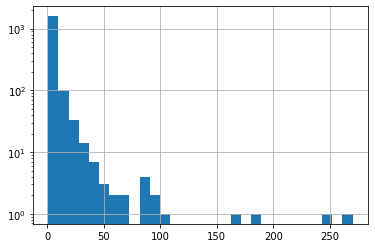

In [3]:
data.groupby('species').count().chemical.hist(bins=30,log=True)

<AxesSubplot:>

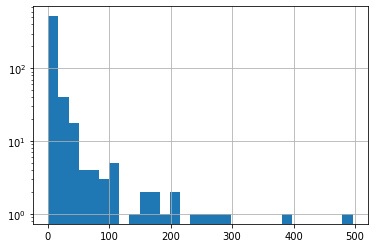

In [4]:
data.groupby('chemical').count().species.hist(bins=30,log=True)

(4.13464533786474, 1.691965380643943)

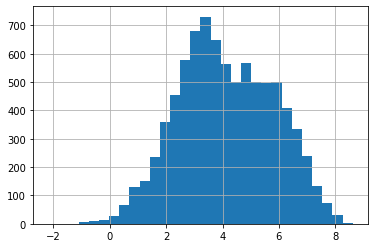

In [5]:
data['conc (mol/L)'].hist(bins=30)
data['conc (mol/L)'].mean(),data['conc (mol/L)'].std()

In [6]:
mapping_species = {k:i for i,k in enumerate(data.species.unique())}
mapping_chemical = {k:i for i,k in enumerate(data.chemical.unique())}

In [7]:
M = np.zeros((len(mapping_species),len(mapping_chemical)))

In [8]:
for i,j in zip(data.species,data.chemical):
    i = mapping_species[i]
    j = mapping_chemical[j]
    M[i,j] = 1

In [9]:
np.unique(M,return_counts=True)

(array([0., 1.]), array([1055548,    8452]))

In [10]:
import networkx as nx

G = nx.DiGraph()

for s,c in zip(data.species,data.chemical):
    G.add_edge(s,c)
    G.add_edge(c,s)
    
edges_to_remove = []
for edge in G.edges():
    if (edge[1],edge[0]) in G.edges() and (edge[1],edge[0]) not in edges_to_remove:
        edges_to_remove.append(edge)
        
for edge in edges_to_remove:
    G.remove_edge(*edge)

In [11]:
G.number_of_nodes(),G.number_of_edges()

(2358, 8452)

In [12]:
nx.algorithms.dag.dag_longest_path(G)

['https://cfpub.epa.gov/ecotox/cas/12027677',
 'https://cfpub.epa.gov/ecotox/taxon/532',
 'https://cfpub.epa.gov/ecotox/cas/7788989',
 'https://cfpub.epa.gov/ecotox/taxon/5',
 'https://cfpub.epa.gov/ecotox/cas/10026116',
 'https://cfpub.epa.gov/ecotox/taxon/4',
 'https://cfpub.epa.gov/ecotox/cas/1310538',
 'https://cfpub.epa.gov/ecotox/taxon/25',
 'https://cfpub.epa.gov/ecotox/cas/106956',
 'https://cfpub.epa.gov/ecotox/taxon/206',
 'https://cfpub.epa.gov/ecotox/cas/107926',
 'https://cfpub.epa.gov/ecotox/taxon/2',
 'https://cfpub.epa.gov/ecotox/cas/120127',
 'https://cfpub.epa.gov/ecotox/taxon/142',
 'https://cfpub.epa.gov/ecotox/cas/479458',
 'https://cfpub.epa.gov/ecotox/taxon/1196',
 'https://cfpub.epa.gov/ecotox/cas/88891',
 'https://cfpub.epa.gov/ecotox/taxon/109',
 'https://cfpub.epa.gov/ecotox/cas/7773015',
 'https://cfpub.epa.gov/ecotox/taxon/10300',
 'https://cfpub.epa.gov/ecotox/cas/137268',
 'https://cfpub.epa.gov/ecotox/taxon/102',
 'https://cfpub.epa.gov/ecotox/cas/529186

In [13]:
from rdflib import Graph, URIRef, BNode, Literal
from rdflib.namespace import RDF, Namespace

tax = Graph()
tax.load('../TERA_OUTPUT/ecotox_taxonomy.nt',format='nt')

chem = Graph()
chem.load('reduced_kgs/reduced_chebi.ttl',format='ttl')


In [14]:
#TODO add chemical and tax group exploration.

other = ['https://cfpub.epa.gov/ecotox/group/StandardTestSpecies',
        'https://cfpub.epa.gov/ecotox/group/U.S.Exotic/NuisanceSpecies',
        'https://cfpub.epa.gov/ecotox/group/U.S.ThreatenedandEndangeredSpecies']

divs = []
others = []
for s in data.species:
    uri = URIRef(s)
    div = sorted(list(map(str,tax.objects(subject=uri,predicate=URIRef('https://cfpub.epa.gov/ecotox/ecotoxGroup')))))
    idx = [div.index(o) for o in other if o in div]
    
    ot = ','.join(div[i] for i in idx)
    if ot == ',': ot = None
    
    div = [div[i] for i in range(len(div)) if i not in idx][0]
    
    others.append(ot)
    divs.append(div)

data['species_divisions'] = divs
data['species_others'] = others


In [15]:
data.groupby('species_divisions').count()

,Unnamed: 0,species,chemical,conc (mol/L),species_others
species_divisions,,,,,
https://cfpub.epa.gov/ecotox/group/Algae,27,27,27,27,27
https://cfpub.epa.gov/ecotox/group/Amphibians,371,371,371,371,371
https://cfpub.epa.gov/ecotox/group/Birds,2,2,2,2,2
https://cfpub.epa.gov/ecotox/group/Crustaceans,2226,2226,2226,2226,2226
https://cfpub.epa.gov/ecotox/group/Ferns,18,18,18,18,18
https://cfpub.epa.gov/ecotox/group/Fish,2936,2936,2936,2936,2936
https://cfpub.epa.gov/ecotox/group/Hornworts,2,2,2,2,2
https://cfpub.epa.gov/ecotox/group/Insects/Spiders,1239,1239,1239,1239,1239
https://cfpub.epa.gov/ecotox/group/Invertebrates,328,328,328,328,328


In [121]:
import tqdm.notebook as tq


for p in ['http://www.w3.org/2000/01/rdf-schema#subClassOf']:

    divs = []
    for c in tq.tqdm(data.chemical):
        uri = URIRef(c)
        
        q = """
            select ?c where {
                ?s rdfs:subClassOf* ?c .
                ?c rdfs:subClassOf ?top .
            }"""
        
        div = chem.query(q,initNs={'rdfs':Namespace('http://www.w3.org/2000/01/rdf-schema#')},
                        initBindings={'s':URIRef(c),
                                      'top':URIRef('http://purl.obolibrary.org/obo/CHEBI_72695')})
        div = sorted([d[0] for d in div if not isinstance(d[0],BNode)])
        
        div = ','.join(div)
        if div == ',': div = None

        divs.append(str(div))

    singles = set([d for d in divs if len(d.split(','))<2])
    
    divs = [for if len(d.split(','))>1]
        
    data[p.split('#')[-1]] = divs


In [18]:
data.groupby('subClassOf').count()

,Unnamed: 0,species,chemical,conc (mol/L),species_divisions,species_others
subClassOf,,,,,,
,5533,5533,5533,5533,5533,5533
http://purl.obolibrary.org/obo/CHEBI_134179,272,272,272,272,272,272
"http://purl.obolibrary.org/obo/CHEBI_134179,http://purl.obolibrary.org/obo/CHEBI_33832",103,103,103,103,103,103
"http://purl.obolibrary.org/obo/CHEBI_134179,http://purl.obolibrary.org/obo/CHEBI_35716",1,1,1,1,1,1
"http://purl.obolibrary.org/obo/CHEBI_134179,http://purl.obolibrary.org/obo/CHEBI_36587",54,54,54,54,54,54
"http://purl.obolibrary.org/obo/CHEBI_134179,http://purl.obolibrary.org/obo/CHEBI_73474",2,2,2,2,2,2
http://purl.obolibrary.org/obo/CHEBI_33832,1478,1478,1478,1478,1478,1478
"http://purl.obolibrary.org/obo/CHEBI_33832,http://purl.obolibrary.org/obo/CHEBI_35716",44,44,44,44,44,44
"http://purl.obolibrary.org/obo/CHEBI_33832,http://purl.obolibrary.org/obo/CHEBI_36587",586,586,586,586,586,586


In [35]:
import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """select ?cas ?smiles where {
  [] wdt:P233 ?smiles ;
     wdt:P231 ?cas .
}"""

def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

cas_to_smiles = {}

for result in results["results"]["bindings"]:
    cas = result['cas']['value'].replace('-','')
    smiles = result['smiles']['value']
    cas_to_smiles[cas] = smiles

In [40]:
data['smiles']=list(map(lambda x:cas_to_smiles[x.split('/')[-1]] if x.split('/')[-1] in cas_to_smiles else None, data.chemical))

In [43]:
!git clone https://github.com/Erik-BM/pySMIfp

fatal: destination path 'pySMIfp' already exists and is not an empty directory.


In [44]:
from pySMIfp.smiles_fingerprints import smiles_fingerprint

In [81]:
smiles_fp = data['smiles'].apply(lambda x: smiles_fingerprint(x) if x else None)

In [82]:
idx = [i for i,e in enumerate(smiles_fp.values) if e is not None]

In [83]:
smiles_fp = [np.asarray(s) for s in smiles_fp.values if s is not None]

In [123]:
from sklearn.cluster import KMeans
kmeans = KMeans(5)
kmeans.fit(np.unique(smiles_fp,axis=0))

KMeans(n_clusters=5)

In [107]:
data['smiles_clusters'] = -1

In [124]:
data.loc[idx,'smiles_clusters'] = kmeans.predict(smiles_fp)

In [125]:
data.groupby('smiles_clusters').count()

,Unnamed: 0,species,chemical,conc (mol/L),species_divisions,species_others,subClassOf,smiles
smiles_clusters,,,,,,,,
-1,76,76,76,76,76,76,76,0
0,710,710,710,710,710,710,710,710
1,364,364,364,364,364,364,364,364
2,2295,2295,2295,2295,2295,2295,2295,2295
3,14,14,14,14,14,14,14,14
4,4993,4993,4993,4993,4993,4993,4993,4993


In [126]:
data.to_csv('effect_data_extra.csv')